# Shapely and geometry objects

In this lesson, you will learn how to create and manipulate geometries in Python
using the [Shapely Python
Package](https://shapely.readthedocs.io/en/stable/manual.html).

**Sources:** Parts of this chapter are based on [shapely’s
documentation](https://shapely.readthedocs.io/) and on chapter 3 of [Westra E.
(2013)](https://www.packtpub.com/application-development/python-geospatial-development-second-edition).


## Spatial data model

![Spatial data model](fig/simple-features_595x500px.svg)


Fundamental geometric objects (‘simple features’) that can be used in Python
with [shapely](https://shapely.readthedocs.io/). <br /> *(Figures by M. W.
Toews; cf. [Wikipedia’s article on GeoJSON](https://en.wikipedia.org/wiki/GeoJSON))*
:::

All geospatial vector data can be described by a combining a set of fundamental
geometric objects: **points**, **lines**, and **polygons** are the basic
ingredients of working with spatial data.

In Python, the library package [shapely](https://shapely.readthedocs.io/) has
become the standard tool for working with geo-spatial objects, and for carrying
out a range of geometric operations. A basic understanding of how *shapely*
works is paramount for using higher-level tools, such as, for instance,
[geopandas](https://geopandas.pydata.org/) (see [lesson 2](../lesson-2/overview))
that handles entire data sets of geographic information (a.k.a. ‘layers’).


Shapely, like the vast majority of geospatial software, follows the data model
set forward in the [Open Geospatial Consortium’s *Simple Feature Access*
standard](https://www.ogc.org/standards/sfa). In this chapter, we use the
terminology used by *shapely*, but the general concepts are applicable much more
widely.


### Geometric objects are described and constructed by *coordinate tuples*

Even more fundamental than that, **coordinate tuples** are what is used to
define the geometric fundamentals point, line, and polygon. Coordinate tuples
typically are either two-dimensional `(x, y)`, or three-dimensional `(x, y, z)`.

> **Info: Tuples**  
> A [tuple](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences) is a Python data structure that consists of a number of values separated by commas. Coordinate pairs are often represented as a tuple. For example, `(60.192059, 24.945831)` is a tuple with two values, `(1,)` a tuple with one value (note the comma that distinguishes a one-value tuple from a mathematical expression in parentheses), and `tuple([1, 2, 3])` converts (‘casts’) a `list` into a `tuple`.
> 
> Tuples belong to the [sequence data types](https://docs.python.org/3/library/stdtypes.html#typesseq) in Python. Other sequence data types are lists and ranges. Tuples have many similarities with lists and ranges, but they are often used for different purposes.
> 
> The main difference between tuples and lists is that tuples are [immutable](https://docs.python.org/3/glossary.html#term-immutable), which means that the contents of a tuple cannot be altered (while lists are mutable; you can, for example, add and remove values from lists).


### Points

**Point** geometries represent a singular point (in two- or three-dimensional
Euclidean space). Points are defined by a single coordinate tuple.

### LineStrings

**LineString** geometries (and the related **LinearRing**s) represent lines.
They are defined by a sequence of points. By connecting the points in order,
a line is formed, if the first and last point are the same, a linear ring.
Consequently, to describe a *LineString*, at least two points are necessary, 
for a *LinearRing* at least three (first and last being identical).

### Polygons

Finally, **Polygon** geometries represent an area. A polygon is defined by
exactly one *LinearRing* as its circumference, and any number of additional
*LinearRing*s representing holes that are cut out. As such, at minimum, three
coordinate tuples are needed to define a Polygon (but it becomes more difficult
quickly, as, naturally, the coordinates that define the holes have to lie within
the exterior *LinearRing*, and also must not intersect each other).


### Collections of geometric objects

All of the fundamental geometric types can be combined to represent more complex
geographic features, such as, for instance, administrative areas that consist of
multiple discontinuous regions:


# Multipolygons

![A map of Austria showing that the province of Tyrol consists of two](fig/multipolygons_595x300px.svg)


*Tyrol*, a federal state of Austria, is a **MultiPolygon**. *(Data: [Statistics
Austria](https://data.statistik.gv.at/web/meta.jsp?dataset=OGDEXT_GEM_1))*



- **MultiPoint** geometries represent collections of points.
- **MultiLineString** geometries represent collections of lines.
- **MultiPolygon** geometries represent collections of polygons.
- **GeometryCollection** geometries are collections of points,
  lines, and polygons, as well as multi-points, multi-lines,
  and multi-polygons.


## Using shapely to create, access, manipulate and analyse geometric objects

Shapely can perform many useful operations on geometries, and provides a range
of attributes of geometries. For instance, you can:
- create lines and polygons from a set of points
- calculate the area, length, perimeter, etc., of geometries
- perform geometric operations on a set of geometries, for instance, merging
  (`union`), subtracting (`difference`), or calculating the distance between
  geometries.
- query the relationship between geometries, i.e., find out whether two
  geometries intersect, touch, cross, etc.


### Creating `Point` geometries and accessing their properties

Creating a point geometry object is easy: simply pass coordinates (x, y, and
possibly z) to its [constructor](https://pythonbasics.org/constructor/).

In [2]:
# Import `shapely.geometry.Point` class
from shapely.geometry import Point

# Create `Point` objects:
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point4_3D = Point(9.26, -2.456, 0.57)

Let’s see what these variables now contain:

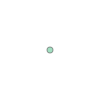

In [3]:
point1

As we can see, Jupyter notebook is able to display the shape directly on the screen.

Alternatively, use a `print` statement to show the text representation of a
shapely geometry object:

In [4]:
print(point1)
print(point4_3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


This text representation is in [‘Well-Known Text’ (WKT)
format](https://en.wikipedia.org/wiki/Well-Known_Text/), a standard set forward
in the [Open Geospatial Consortium’s (OGC)](https://www.ogc.org/) [*Simple
Feature Access*](https://www.ogc.org/standards/sfa) (see above). This includes
the additional letter ‘Z’ that marks the three-dimensional version of a
geometry (e.g., our point `point4_3D`).


Let’s also check the data type of a point:

In [5]:
type(point1)

shapely.geometry.point.Point

We can see that the type of the point is a `shapely.geometry.point.Point`
(which is equivalent to `shapely.geometry.Point`, the class we used to
instantiate the point object). 

Under the hood, shapely uses [GEOS](https://osgeo.org/projects/geos/) to handle
geometry objects. GEOS is a C++ library (much faster than Python code), and is
one of the fundamental pillars of the open source GIS world, powering
geospatial processing for many projects, including [QGIS](https://qgis.org/).


### Point properties and methods

Points and other shapely geometry objects have useful built-in [properties and
methods](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods).
Using the available attributes, we can for example extract the coordinate
values of a Point and calculate the Euclidian distance between points.

The `geom_type` property contains information about the geometry type of a
shapely geometry:

In [6]:
point1.geom_type

'Point'

There are multiple ways to access the coordinates of geometry object. For
instance, `coords` is a `spapely.coords.CoordinateSequence`. It is an
`Iterator`, an efficient Python data structure to iterate over lists of items,
but for now we can simply convert it into a list of the (one pair of)
coordinates:

In [7]:
# Get coordinate tuple(s)
list(point1.coords)

[(2.2, 4.2)]

However, since points, by definition, only contain one coordinate tuple,
`shapely.geometry.Point`s have properties to *directly* access its coordinate
values: the properties `x`, `y`, and (possibly) `z`, which are basic `float`
type decimal numbers.

In [8]:
x = point1.x
y = point1.y

print(x, y)

2.2 4.2


In [9]:
x = point4_3D.x
y = point4_3D.y
z = point4_3D.z

print(x, y, z)

9.26 -2.456 0.57


It is also possible to calculate the distance between two objects using the
[distance](https://shapely.readthedocs.io/en/stable/manual.html#object.distance)
method.

In our example the distance is calculated in a cartesian coordinate system.
When working with real GIS data the distance is based on the used coordinate
reference system. always check what is the unit of measurement (for example,
meters) in the coordinate reference system you are using.

Let’s calculate the distance between `point1` and `point2`:

In [10]:
# Check input data
print(point1)
print(point2)

POINT (2.2 4.2)
POINT (7.2 -25.1)


In [11]:
# Calculate the distance between point1 and point2
dist = point1.distance(point2)

# Print out a nicely formatted info message
print(f"Distance between the points is {dist:.2f} units")

Distance between the points is 29.72 units


> **Caution:**  
> Shapely geometries are, by design, agnostic (unaware) of the reference system used to represent them. Distances and surface area calculated using the built-in shapely methods will always:
> a) assume a flat, Cartesian, Euclidean space, and 
> b) return the calculated value in the unit of the coordinates (e.g., meters, or degrees).
> 
> This is perfectly fine for small-scale geo-spatial operations, if you **keep yourself aware of the expected output unit**. Most packages built on top of shapely, for instance [GeoPandas](https://geopandas.org/), which we will get to know in lesson 2, bring their own functions and take the coordinate reference system into consideration.




## Lines


Creating `LineString` objects is similar to creating `Points`. Instead of a
single coordinate tuple, we pass a list of coordinate tuples, or a list of
points, that make up the line:

In [12]:
# import the LineString class
from shapely.geometry import LineString

# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

In [13]:
# Create a LineString from a list of coordinates:
# (with the same coordinate values as the points, so results should be identical)
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [14]:
# Check if the lines are, indeed, identical:
line == line2

True

Let’s see how our line looks like:

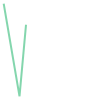

In [15]:
line

In [16]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


Again, the text representation is in WKT format. WKT is convenient as it is a
human-readable text format that also most GIS tools can readily use. 

It’s not surprising, but we can see that a `LineString` is constituted of
multiple coordinate tuples. In fact, the value(s) of a WKT `LINESTRING` are made
up of the values of multiple WKT `POINTS`, joined together with a comma.

Check also the data type:

In [17]:
# Check data type of the line object
type(line)

shapely.geometry.linestring.LineString

In [18]:
# Check geometry type of the line object
line.geom_type

'LineString'

### `LineString` properties and methods

Linear geometries in their shapely representations (`LineString`, `LinearRing`,
`MultiLineString`) have a variety of properties and methods that expose useful
functionality. For instance, it is possible to access a geometry’s coordinates,
calculate its lengths, find its centre point, create points along the line at a
specified interval, or compute the closest distance between a line an another
geometry. 


> **Tip:**  
> Consult the [Shapely user manual](https://shapely.readthedocs.io/en/stable/manual.html) for a complete list of geometry attributes and operations on one or more geometries.



Fundamentally, accessing the coordinates of a line is very similar as accessing
the ones of a point:

In [19]:
# Get coordinate tuples
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

Because a line has to have at least two coordinate tuples, the list now
contains more than the one value we saw earlier with points.


If you would need to access all x-coordinates or all y-coordinates of the line,
you can use its `xy` attribute (an iterator, but, again, for now, we can use
them as lists):

In [20]:
# Obtain x and y coordinates
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


> **Warning: 3D-LineStrings**  
> Note that the `xy` property of shapely geometries does not return `z` values for three-dimensional geometries.



Other properties of lines that are useful for GIS analyses include the length
and the centre point (centroid) of lines:

In [21]:
# Get the length of the line
line_length = line.length
# Print the length as f-string
print(f"Length of our line: {line_length:.1f} units")

Length of our line: 52.5 units


In [22]:
# Get the centre point of the line
print(line.centroid)

POINT (6.229961354035622 -11.892411157572392)


The centroid (or centre *point*) of a line (or any other shapely geometry) is a
`shapely.geometry.Point` object.



## Polygon

Creating a polygon geometry follows the same logic as creating a point or line
geometry. However, [as discussed above](#polygons) the rules for what
constitutes a polygon are more complex: It is constructed of exactly one linear
ring forming its exterior (perimeter), and any number of additional linear
rings forming holes that are cut out of the exterior shell.

Consequently, the `shapely.geometry.Polygon` *constructor* function accepts two
parameter: the first one, `shell`, is a list of coordinate tuples, a list of
points, or a `LinearRing`, and will form the outer hull of the new polygon. The
second, optional, parameter `holes` can be a list of holes to cut out of
`shell` (the items in the list can be the same data types as `shell`).

For now, let’s create a simple polygon without any holes. The first example
uses **(at least three) coordinate tuples** (three points are required to form
a surface):

In [23]:
from shapely.geometry import Polygon

# Create a Polygon from the coordinates
polygon1 = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

We can also construct the polygon directly from a list of points:

In [24]:
polygon2 = Polygon([point1, point2, point3])

… or from a [`LinearRing`](https://shapely.readthedocs.io/en/stable/manual.html#linearrings)
(which has an [almost identical behaviour](#linestrings) as a `LineString`,
except that it is closed, i.e., the first and last point are identical):

In [25]:
from shapely.geometry import LinearRing

shell = LinearRing([point1, point2, point3, point1])
polygon3 = Polygon(shell)

(When constructing a `shapely.geometry.LinearRing`, you can omit listing
the first point again at the end; shapely will then implicitely add the
first point another time to the end of the list of points)

We used different methods to construct the three polygons, but we used the
same values. Let’s see whether they ended up describing identical geometries:

In [26]:
polygon1 == polygon2 == polygon3

np.True_

Let’s also see how the polygon looks like drawn, and what its text
representation is:

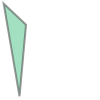

In [27]:
polygon1

In [28]:
print(polygon1)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


Just like with points and lines, the text representation of a
`shapely.geometry.Polygon` is in the Well-Known Text format. Note how a WKT
`POLYGON` is made up of the values of one or more WKT `LINEARRING`’s values
(closed line strings), in parentheses, and joined together by commas. The first
linear ring represents the exterior, all following ones holes.
(Our example polygon consists of one linear ring, only, so no need for the comma).


Check also the data type:

In [29]:
# Data type
type(polygon1)

shapely.geometry.polygon.Polygon

In [30]:
# Geometry type
polygon1.geom_type

'Polygon'

> **Tip:**  
> You can always use the built-in `help()` function to find out how a function or class works, which parameters it expects, and what properties and methods you can use.


In [31]:
# Check the help for Polygon objects:


Let’s still see how to create a polygon with a hole:

In [32]:
# define the exterior
outer = LinearRing([(-180, 90), (-180, -90), (180, -90), (180, 90)])

# define a hole:
hole = LinearRing([(-170, 80), (-100, -80), (100, -80), (170, 80)])

Let’s see how the exterior shell and the hole look like on their own:

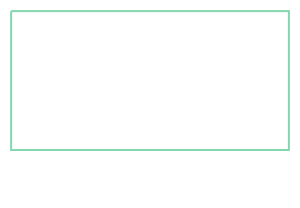

In [33]:
outer

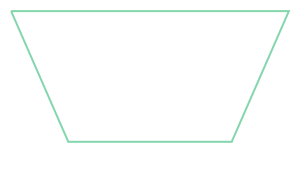

In [34]:
hole

A polygon using only the exterior shell:

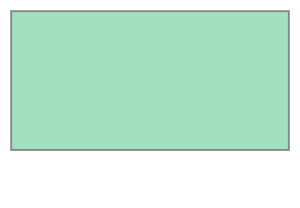

In [35]:
polygon_without_hole = Polygon(outer)
polygon_without_hole

And, finally, a polygon defined by the exterior shell, and one hole
(note that `holes` need to be specified as a list):

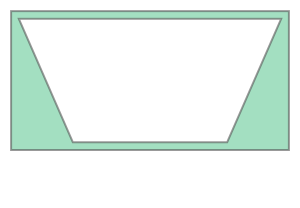

In [36]:
polygon_with_hole = Polygon(outer, [hole])
polygon_with_hole

In [37]:
print(polygon_without_hole)
print(polygon_with_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -100 -80, 100 -80, 170 80, -170 80))


### Polygon properties and methods

Very similar to lines and points, also `shapely.geometry.Polygon`s expose a
number of properties and methods that can be useful for spatial analysis tasks.
Consult the [shapely user
manual](https://shapely.readthedocs.io/en/stable/manual.html) for a complete
list, and see a few examples here:

In [38]:
print(f"Polygon centroid: {polygon_with_hole.centroid}")
print(f"Polygon area: {polygon_with_hole.area}")
print(f"Polygon bounding box: {polygon_with_hole.bounds}")
print(f"Polygon exterior ring: {polygon_with_hole.exterior}")
print(f"Polygon circumference: {polygon_with_hole.exterior.length}")

Polygon centroid: POINT (0 -13.827160493827162)
Polygon area: 21600.0
Polygon bounding box: (-180.0, -90.0, 180.0, 90.0)
Polygon exterior ring: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon circumference: 1080.0


But how about the interiors of the polygon? Can you guess how we can  get that?

In [54]:
# Interiors
for interior in polygon_with_hole.interiors:
    print(f"Interior ring: {interior}")
    print(f"Interior length: {interior.length}")
    print(f"Interior area: {Polygon(interior).area}")

Interior ring: LINEARRING (-170 80, -100 -80, 100 -80, 170 80, -170 80)
Interior length: 889.2849839314597
Interior area: 43200.0


As we can see above, it is again fairly straightforward to access different attributes of `Polygon` objects. Note that distance metrics will make more sense when we start working with data in projected coordinate systems.


## Check your understanding

Plot these shapes using shapely!

- **Pentagon**, example coordinates: `(30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)`
- **Triangle**
- **Square**
- **Circle**

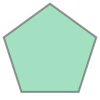

In [40]:
# Pentagon 
Polygon([(30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)])

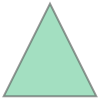

In [41]:
Polygon([(0,0), (2,4), (4,0)])

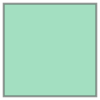

In [42]:
# Square
Polygon([(0,0), (0,4), (4,4), (4,0)])

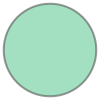

In [43]:
# Circle (using a buffer around a point) 
# You can make a buffer using "point.buffer(r)"
point = Point((0,0))
point.buffer(1)

## Geometry collections (optional)

Sometimes, it can be useful to store multiple geometries (for example, several
points or several polygons) in a single feature. See, for instance, the
[example of Tyrol above](#multipolygons). Its two parts share the same
attributes, and together are equivalent to any of the other provinces of
Austria. Semantically, it would not make sense to store the two polygons in
separate rows. If expressed as a MultiPolygon, Tyrol would represent one
row of information in the attribute table with multiple polygons attached.


> **Caution:**  
> By convention, data sets should always consist of either single- or multi-geometries. Some file formats enforce this, and many GIS tools refuse operation on data sets with mixed single- and multi-geometries.
> 
> If one feature in a data set is a MultiGeometry, all other features should be converted, too. All single geometries can be expressed as a collection of one item.



In shapely, collections of points are implemented as `MultiPoint` geometries,
collections of lines as `MultiLineString` geometries, and collections of
polygons as `MultiPolygon` geometries.

In [44]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

# Create a MultiPoint object of our points 1,2 and 3
multipoint = MultiPoint([point1, point2, point3])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multiline = MultiLineString([line1, line2])

print(multipoint)
print(multiline)

MULTIPOINT ((2.2 4.2), (7.2 -25.1), (9.26 -2.456))
MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))


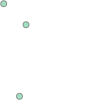

In [45]:
multipoint

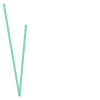

In [46]:
multiline

`MultiPolygons` are constructed in a similar manner. Let’s create a bounding box
for ‘the world’ by combining two separate polygons that represent the western and
eastern hemispheres.

POLYGON ((-180 90, -180 -90, 0 -90, 0 90, -180 90))


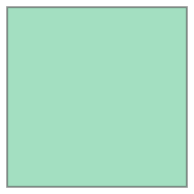

In [47]:
# Let’s create the exterior of the western part of the world
western_hemisphere = Polygon([(-180, 90), (-180, -90), (0, -90), (0, 90)])
print(western_hemisphere)
western_hemisphere

Shapely has a short-hand function for creating rectangular polygons, ‘boxes’. It
can be used, for instance, to create [bounding
boxes](https://en.wikipedia.org/wiki/Minimum_bounding_box) using minimum and
maximum x and y coordinates. 

Let’s use
[shapely.geometry.box()](https://shapely.readthedocs.io/en/stable/manual.html#shapely.geometry.box)
for creating the polygon representing the the eastern hemisphere:

POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))


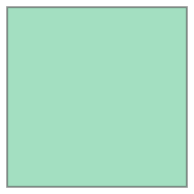

In [48]:
from shapely.geometry import box
min_x = 0
max_x = 180
min_y = -90
max_y = 90

eastern_hemisphere = box(min_x, min_y, max_x, max_y)

print(eastern_hemisphere)
eastern_hemisphere

Finally, we can combine the two polygons into a MultiPolygon:

MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


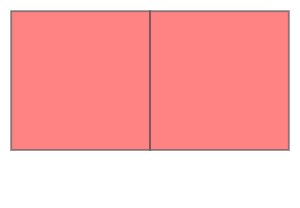

In [49]:
# Let’s create our MultiPolygon.
# Pass multiple Polygon objects as a list
multipolygon = MultiPolygon([western_hemisphere, eastern_hemisphere])

print(multipolygon)
multipolygon

Multi-geometries are in many ways similar to simple geometries, like the ones we
created earlier. The main difference is that they can combine multiple geometric
primitives into one feature.


## Convex hull and envelope

A ‘convex hull’ refers to the smallest possible
[convex](https://en.wikipedia.org/wiki/Convex_set) polygon that can contain a
geometry or a set of geometries. Alongside bounding boxes, convex hulls are
useful to describe the extent of data sets.

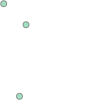

In [50]:
# Check input geometry
multipoint

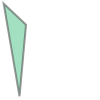

In [51]:
# Convex Hull
multipoint.convex_hull

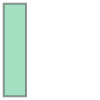

In [52]:
# Envelope (smalles rectangular polygon around a geometry/set of geometries):
multipoint.envelope

## Validity of geometries

As discussed on the very top of this page, already the geometric primitives have
certain requirements. For instance, a `LineString` must consist of at least two
points, and a `Polygon`’s [exterior shell and holes must not
intersect](https://shapely.readthedocs.io/en/1.8.5/manual.html#polygons).

Each shapely geometry has a built-in check that can be of great help, for
instance, finding topological errors:

In [53]:
print(f"Is polygon valid?: {polygon_with_hole.is_valid}")

Is polygon valid?: True
